## ML Project Steps: 

1. Take big view.
2. Get your data ready, explore your data.
3. Feature engineering for ML algorithms
4. Pick ML model and train it -- today we use simple linear model and randomTreeRegressor

### 1. Take big view

In [2]:
import numpy as np
import pandas as pd
import os
# to make this notebook's output identical at every run
np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

##### We load open-source data from SF MLS historical database.

In [3]:
df = pd.read_csv('Sales.csv') 
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,...,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,...,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,...,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,...,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,...,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,...,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


 Seems like we cannot see all the columns, to do so:

In [6]:
pd.set_option('display.max_columns', None)
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,1050,1,SF District 1,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


In [8]:
df.columns

Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

All the records are from California

In [6]:
df['state'].unique()

array(['CA'], dtype=object)

Further, all the records are from San Francisco

In [7]:
df['city'].unique()

array(['San Francisco'], dtype=object)

In [9]:
## summary of the housing data : columns and basic statistics
## Each row represents one district
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23711 entries, 0 to 23710
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   longitude        23242 non-null  float64
 1   latitude         23242 non-null  float64
 2   elevation        23242 non-null  float64
 3   full_address     23711 non-null  object 
 4   city             23711 non-null  object 
 5   state            23711 non-null  object 
 6   street_no        23711 non-null  int64  
 7   street_name      23711 non-null  object 
 8   street_suffix    22098 non-null  object 
 9   zip              23711 non-null  int64  
 10  area             23711 non-null  int64  
 11  district_no      23711 non-null  int64  
 12  district_desc    23711 non-null  object 
 13  subdist_no       23711 non-null  int64  
 14  subdist_desc     23711 non-null  object 
 15  on_market_date   23711 non-null  object 
 16  cdom             23711 non-null  int64  
 17  orig_list_pr

In [9]:
df.describe()


,longitude,latitude,elevation,street_no,zip,area,district_no,subdist_no,cdom,orig_list_price,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
count,23242.000000,23242.000000,23242.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,23711.000000,2.371100e+04,2.371100e+04,23711.000000,23711.000000,23711.000000,10332.000000,23711.000000,23711.000000,23711.000000
mean,-122.447325,37.745273,249.562446,1001.928936,94120.321412,5581.341993,5.535321,5581.341993,43.288685,1.791031e+06,1.371454e+06,4.463203,2.079636,3.006664,0.858479,1242.486061,1817.956392,1.497533
std,0.031239,0.022504,152.766784,1088.454442,43.495644,3246.142173,3.251098,3246.142173,55.594501,1.836568e+07,1.298631e+06,3.375162,1.088199,1.084513,47.421977,1599.570446,457.579238,0.775076
min,-122.509650,37.707893,8.370000,1.000000,91107.000000,1010.000000,1.000000,1010.000000,0.000000,1.000000e+00,1.050000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.470070,37.729390,138.140000,164.000000,94112.000000,2070.000000,2.000000,2070.000000,13.000000,6.811110e+05,7.030000e+05,0.000000,1.000000,2.000000,0.054500,0.000000,1911.000000,1.000000
50%,-122.445050,37.741936,227.700000,549.000000,94118.000000,5030.000000,5.000000,5030.000000,27.000000,8.990000e+05,1.008000e+06,5.000000,2.000000,3.000000,0.060800,0.000000,1927.000000,1.000000
75%,-122.425723,37.757972,329.685000,1619.000000,94127.000000,9020.000000,9.000000,9020.000000,51.000000,1.450000e+06,1.588000e+06,7.000000,2.500000,4.000000,0.069200,2500.000000,1946.000000,2.000000
max,-122.370895,37.806440,825.500000,8332.000000,97124.000000,10120.000000,10.000000,10120.000000,2054.000000,9.950000e+08,3.200000e+07,30.000000,14.000000,40.000000,3283.000000,28788.000000,2018.000000,7.000000


##### Let's revisit this dataset:

In [10]:
df.head()

,longitude,latitude,elevation,full_address,city,state,street_no,street_name,street_suffix,zip,area,district_no,district_desc,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,"2645 El Camino Del Mar, San Francisco, CA 94121",San Francisco,CA,2645,El Camino Del Mar,NaN,94121,1050,1,SF District 1,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,"1278 La Playa St, San Francisco, CA 94122",San Francisco,CA,1278,La Playa,St,94122,2030,2,SF District 2,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,"590 48th Ave, San Francisco, CA 94121",San Francisco,CA,590,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,"618 48th Ave, San Francisco, CA 94121",San Francisco,CA,618,48th,Ave,94121,1050,1,SF District 1,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


***We can have a look at each column:***

+ longitude, latitute and elevation : for precise location of the house
+ full_address: also detailed location, if we use google map or other mapping system, we could map the (longtitude, latitute, elevation) location to street and numbers

+ state and city: all records are from San Francisco, California

+ street no, street name, street suffix: supplemental information for full address

+ zip, area, district_no, district_desc: zip code, location and neighbourhood's name

+ on_market_date, cdom: listing date and cumulative days on market

Others are self-explanatory

##### Let's have a look at the whole data and distribution:

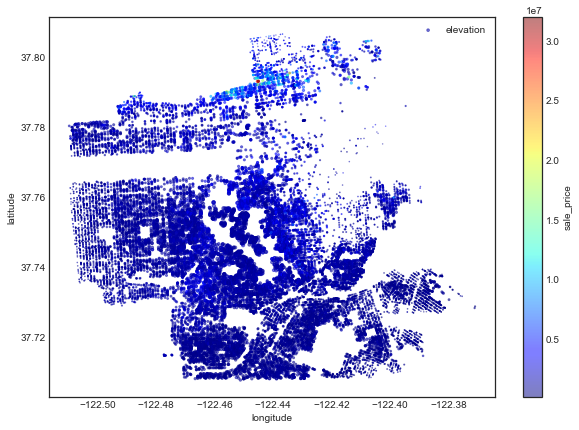

In [10]:
## Heatmap for median_income
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5,
    s=df["elevation"]/60, label="elevation", figsize=(10,7),
    c="sale_price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

### 2. Get data ready and explore data

We need to drop some data which is redundant and not needed in our analysis, for example, subdist_desc is a much better measure to determine the house price rather than street_no.

In [11]:
df.columns

Index(['longitude', 'latitude', 'elevation', 'full_address', 'city', 'state',
       'street_no', 'street_name', 'street_suffix', 'zip', 'area',
       'district_no', 'district_desc', 'subdist_no', 'subdist_desc',
       'on_market_date', 'cdom', 'orig_list_price', 'sale_date', 'sale_price',
       'rooms', 'baths', 'beds', 'lot_acres', 'lot_sf', 'year_built',
       'num_parking'],
      dtype='object')

In [12]:
df.drop(['full_address', 'city', 'state', 'street_no', 'street_name', 'street_suffix', 'district_no', 'district_desc'], \
        axis=1, inplace = True)

In [13]:
df.head()

,longitude,latitude,elevation,zip,area,subdist_no,subdist_desc,on_market_date,cdom,orig_list_price,sale_date,sale_price,rooms,baths,beds,lot_acres,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,94121,1050,1050,1 - Outer Richmond,3/14/2013,4,1095000,3/22/2013,1260000,8,3.5,4,NaN,0,1969,2
1,-122.50929,37.762608,23.21,94122,2030,2030,2 - Outer Sunset,12/3/2015,144,1250000,4/25/2016,1075000,9,3.0,4,0.0689,3000,1947,1
2,-122.50929,37.762608,23.21,94122,2030,2030,2 - Outer Sunset,5/18/2017,36,1395000,8/17/2017,1525000,9,5.0,5,0.0689,3000,1947,1
3,-122.50924,37.777330,189.11,94121,1050,1050,1 - Outer Richmond,6/27/2010,42,725000,8/20/2010,715000,5,1.0,2,NaN,0,1939,2
4,-122.50919,37.776695,175.89,94121,1050,1050,1 - Outer Richmond,6/7/2012,24,1595000,7/13/2012,1595000,8,4.0,4,NaN,0,1951,3


We also noticed that, 'area' and 'subdist_no' have same value

In [14]:
False in (df['area'] == df['subdist_no']).values

False

And actually those columns refer to the regional location of the house inside SF city.

In [15]:
df['subdist_desc'].unique()

array(['1 - Outer Richmond', '2 - Outer Sunset', '2 - Outer Parkside',
       '3 - Lake Shore', '2 - Central Sunset', '2 - Parkside',
       '3 - Pine Lake Park', '1 - Sea Cliff', '1 - Central Richmond',
       '1 - Lake Street', '3 - Merced Manor', '3 - Stonestown',
       '2 - Inner Sunset', '2 - Inner Parkside', '3 - Lakeside',
       '2 - Golden Gate Heights', '4 - West Portal',
       '4 - Ingleside Terrace', '3 - Merced Heights',
       '3 - Ingleside Heights', '1 - Inner Richmond',
       '4 - Balboa Terrace', '4 - St. Francis Wood', '4 - Forest Hill',
       '10 - Outer Mission', '4 - Mount Davidson Manor',
       '4 - Monterey Heights', '7 - Presidio Heights',
       '4 - Forest Hill Extensio', '3 - Oceanview', '3 - Ingleside',
       '4 - Forest Knolls', '4 - Westwood Park', '4 - Sherwood Forest',
       '4 - Miraloma Park', '4 - Westwood Highlands', '1 - Lone Mountain',
       '1 - Jordan Park/Laurel H', '5 - Cole Valley/Parnassu',
       '4 - Midtown Terrace', '4 - Sunnysid

![avatar](https://m2p7s3n2.rocketcdn.me/wp-content/uploads/2019/12/SanFranciscoNeighborhoods.jpg)

##### Currently we don't need to consider attributes like on_market_date, zip, sale_date since sale_date normally wouldn't be considered as a major factor for sale price. Those features can represent the market preference and evaluation for certain houses. 

In [16]:
df.drop(['area', 'subdist_no', 'zip', 'on_market_date', 'sale_date', 'lot_acres', 'orig_list_price'], axis=1, inplace = True)

In [17]:
df

,longitude,latitude,elevation,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
0,-122.50965,37.780280,200.83,1 - Outer Richmond,4,1260000,8,3.5,4,0,1969,2
1,-122.50929,37.762608,23.21,2 - Outer Sunset,144,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,36,1525000,9,5.0,5,3000,1947,1
3,-122.50924,37.777330,189.11,1 - Outer Richmond,42,715000,5,1.0,2,0,1939,2
4,-122.50919,37.776695,175.89,1 - Outer Richmond,24,1595000,8,4.0,4,0,1951,3
...,...,...,...,...,...,...,...,...,...,...,...,...
23706,NaN,NaN,NaN,1 - Lone Mountain,19,1300000,6,1.5,3,0,1905,1
23707,NaN,NaN,NaN,10 - Bayview,10,210000,5,1.0,2,0,1907,1
23708,NaN,NaN,NaN,4 - Forest Knolls,24,775000,6,2.5,3,0,1960,3
23709,NaN,NaN,NaN,4 - Forest Knolls,25,830000,6,2.0,3,0,1960,2


For simplicity, here we only consider houses with positive square feet/acres area.

In [18]:
df = df[df['lot_sf'] > 0]
df

,longitude,latitude,elevation,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
1,-122.50929,37.762608,23.21,2 - Outer Sunset,144,1075000,9,3.0,4,3000,1947,1
2,-122.50929,37.762608,23.21,2 - Outer Sunset,36,1525000,9,5.0,5,3000,1947,1
5,-122.50919,37.776695,175.89,1 - Outer Richmond,13,3310000,8,4.0,4,3959,1951,3
7,-122.50909,37.759580,23.45,2 - Outer Sunset,131,1304000,0,2.0,3,2639,1900,1
8,-122.50908,37.759480,23.57,2 - Outer Sunset,24,1303000,5,2.0,3,2996,1900,1
...,...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,13,750000,0,1.0,3,2495,1924,1
23699,NaN,NaN,NaN,10 - Bayview,0,700000,6,1.5,3,2495,1939,2
23700,NaN,NaN,NaN,9 - Potrero Hill,13,1100000,10,2.0,4,2500,0,0
23702,NaN,NaN,NaN,10 - Excelsior,12,935000,7,2.0,3,2495,1948,1


In [19]:
df.describe()

,longitude,latitude,elevation,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
count,10126.000000,10126.000000,10126.000000,10307.000000,1.030700e+04,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000,10307.000000
mean,-122.448406,37.744754,250.973007,28.573397,1.638325e+06,5.001552,2.120379,3.052392,2858.308625,1867.468128,1.502668
std,0.031510,0.021616,150.888372,34.222142,1.317722e+06,3.199887,1.085178,1.049045,1125.793250,348.791788,0.786350
min,-122.509290,37.708320,10.090000,0.000000,2.720700e+05,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,-122.471647,37.729646,141.887500,12.000000,9.500000e+05,4.000000,1.000000,2.000000,2374.000000,1913.000000,1.000000
50%,-122.446060,37.741736,229.710000,17.000000,1.310000e+06,6.000000,2.000000,3.000000,2650.000000,1928.000000,1.000000
75%,-122.426220,37.757056,331.585000,35.000000,1.838000e+06,7.000000,3.000000,4.000000,3014.000000,1946.000000,2.000000
max,-122.375885,37.806440,825.500000,867.000000,3.200000e+07,25.000000,11.000000,14.000000,28788.000000,2018.000000,7.000000


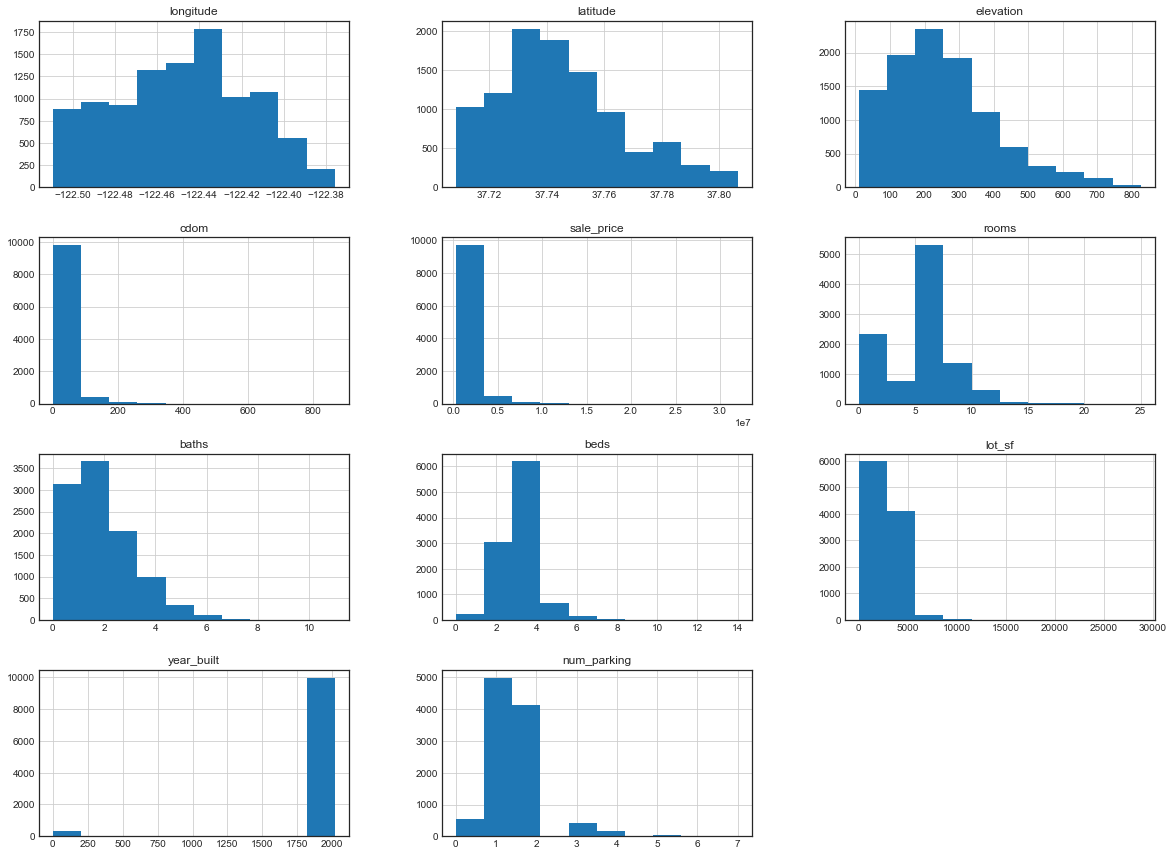

In [20]:
df.hist(figsize=(20,15))
plt.show()

We need to look at some features more granularly:

<AxesSubplot:>

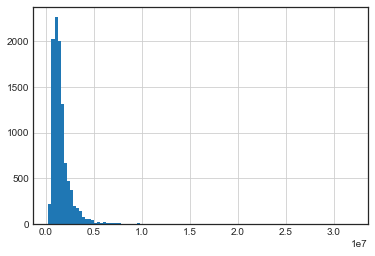

In [21]:
df['sale_price'].hist(bins=100)

In [22]:
df[df['sale_price'] == df['sale_price'].min()]

,longitude,latitude,elevation,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
23210,-122.38213,37.737465,62.48,10 - Bayview,274,272070,5,2.0,2,1024,1992,1


In [23]:
df[df['sale_price'] == df['sale_price'].max()]

,longitude,latitude,elevation,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
11652,-122.44497,37.793003,326.19,7 - Pacific Heights,22,32000000,0,6.0,5,5497,1924,0


Since some of the houses are missing year_built data, and after getting rid of the 0s, the data seems to still have many outliers, the missing data can be filled with the median.

In [24]:
nonzero_year_built = df[df['year_built'] > 0]['year_built']
nonzero_year_built

1        1947
2        1947
5        1951
7        1900
8        1900
         ... 
23697    1941
23698    1924
23699    1939
23702    1948
23705    1905
Name: year_built, Length: 9961, dtype: int64

<AxesSubplot:>

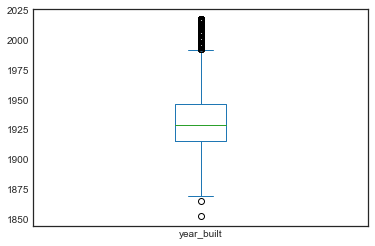

In [25]:
nonzero_year_built.plot.box()

In [26]:
df['year_built']=df['year_built'].replace(0,nonzero_year_built.median())

/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/1575323366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_built']=df['year_built'].replace(0,nonzero_year_built.median())


In [27]:
df[df['year_built'] == df['year_built'].min()]

,longitude,latitude,elevation,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
22749,-122.389366,37.734035,94.34,10 - Bayview,49,950000,7,1.0,3,5000,1852,3


In [28]:
(df[df['year_built'] == df['year_built'].max()]).head()

,longitude,latitude,elevation,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,year_built,num_parking
10029,-122.45094,37.716824,325.08,3 - Ingleside,0,1899979,0,3.5,5,2495,2018,2
10032,-122.45092,37.716854,323.66,3 - Ingleside,45,1760000,0,3.5,5,2500,2018,2
13960,-122.43754,37.737614,402.59,5 - Glen Park,146,3300000,0,3.5,4,3000,2018,2
13962,-122.43752,37.737705,408.04,5 - Glen Park,52,3250000,0,3.5,4,3497,2018,2
14083,-122.43719,37.737823,420.03,5 - Glen Park,10,3635000,10,4.5,5,2500,2018,2


<AxesSubplot:>

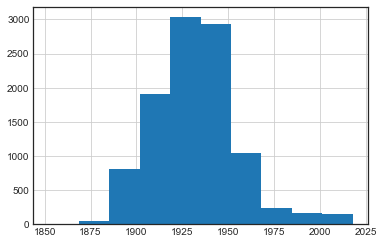

In [29]:
df['year_built'].hist()

In [30]:
df['HouseAge'] = 2022 - df['year_built']
df.drop(['year_built'], axis=1, inplace= True)
df

/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/295208347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseAge'] = 2022 - df['year_built']
/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/295208347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['year_built'], axis=1, inplace= True)


,longitude,latitude,elevation,subdist_desc,cdom,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
1,-122.50929,37.762608,23.21,2 - Outer Sunset,144,1075000,9,3.0,4,3000,1,75
2,-122.50929,37.762608,23.21,2 - Outer Sunset,36,1525000,9,5.0,5,3000,1,75
5,-122.50919,37.776695,175.89,1 - Outer Richmond,13,3310000,8,4.0,4,3959,3,71
7,-122.50909,37.759580,23.45,2 - Outer Sunset,131,1304000,0,2.0,3,2639,1,122
8,-122.50908,37.759480,23.57,2 - Outer Sunset,24,1303000,5,2.0,3,2996,1,122
...,...,...,...,...,...,...,...,...,...,...,...,...
23698,NaN,NaN,NaN,10 - Bayview,13,750000,0,1.0,3,2495,1,98
23699,NaN,NaN,NaN,10 - Bayview,0,700000,6,1.5,3,2495,2,83
23700,NaN,NaN,NaN,9 - Potrero Hill,13,1100000,10,2.0,4,2500,0,93
23702,NaN,NaN,NaN,10 - Excelsior,12,935000,7,2.0,3,2495,1,74


##### We can have a look at internal correlations between different features by scatter plotting them:

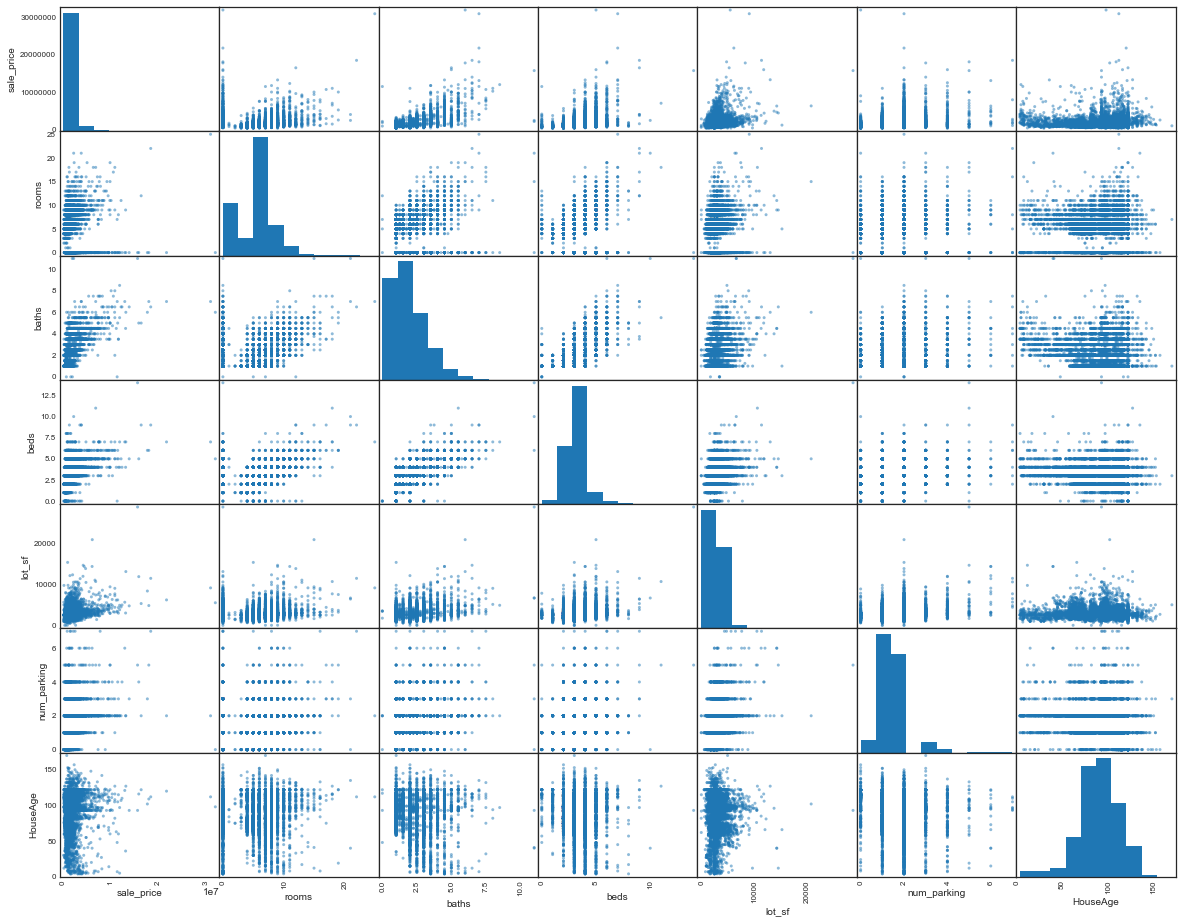

In [31]:
from pandas.plotting import scatter_matrix

attributes = ["sale_price", "rooms", "baths",
              "beds", "lot_sf", "num_parking", "HouseAge"]
scatter_matrix(df[attributes], figsize=(20, 16));

Obviously, we can see some positive correlation between price and lot_sf, baths, rooms, etc.

<AxesSubplot:xlabel='sale_price', ylabel='lot_sf'>

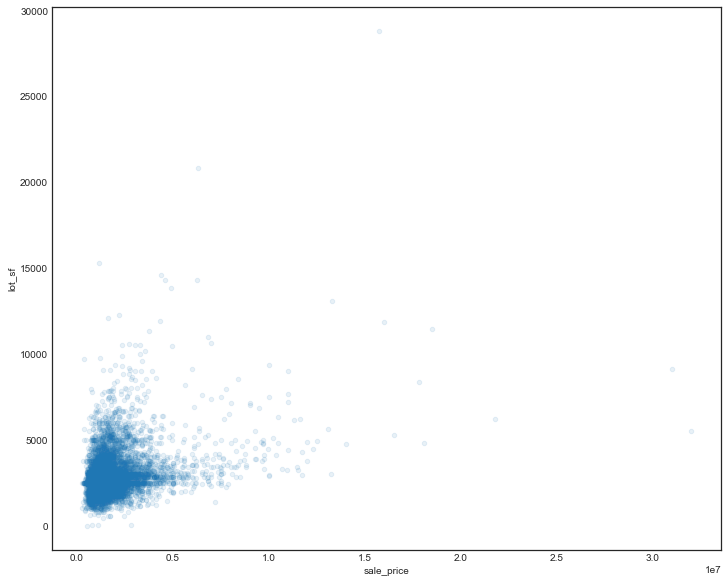

In [32]:
df.plot(kind="scatter", x="sale_price", y="lot_sf",
             alpha=0.1, figsize=(12, 10))

<AxesSubplot:xlabel='sale_price', ylabel='baths'>

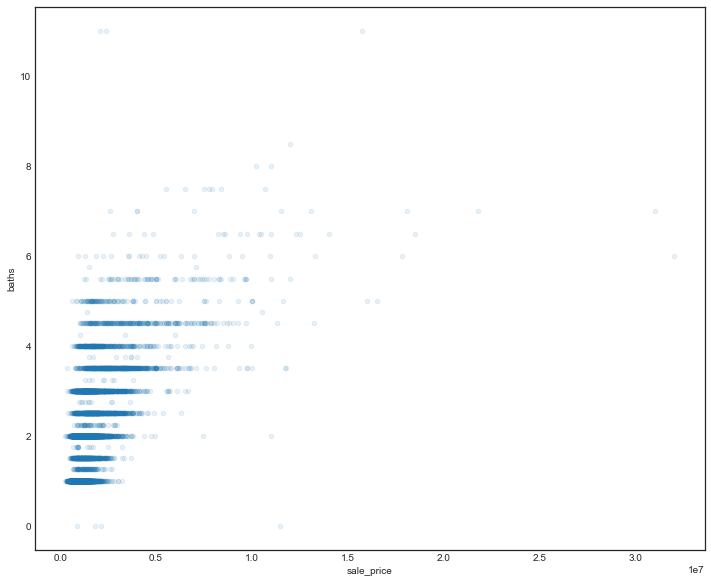

In [33]:
df.plot(kind="scatter", x="sale_price", y="baths",
             alpha=0.1, figsize=(12, 10))

##### We can also have a look at their correlation matrix and then sort the values, need to understand it clearly, not all of them are meaningful:

In [34]:
corr_matrix = df.corr()
corr_matrix

,longitude,latitude,elevation,cdom,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
longitude,1.000000,-0.273649,-0.126373,0.060023,-0.003463,-0.041296,-0.021027,-0.060125,-0.197504,-0.080796,0.052898
latitude,-0.273649,1.000000,-0.111125,-0.017119,0.531524,0.054004,0.293717,0.200636,0.042710,0.102928,0.246193
elevation,-0.126373,-0.111125,1.000000,-0.036254,0.042662,-0.041067,0.088446,0.059711,0.254464,0.066141,-0.169136
cdom,0.060023,-0.017119,-0.036254,1.000000,0.058417,0.050701,0.120250,0.119006,0.056986,0.005838,-0.029514
sale_price,-0.003463,0.531524,0.042662,0.058417,1.000000,0.058985,0.602809,0.450868,0.331275,0.251262,0.118684
rooms,-0.041296,0.054004,-0.041067,0.050701,0.058985,1.000000,0.131502,0.205870,0.093930,0.057571,0.049387
baths,-0.021027,0.293717,0.088446,0.120250,0.602809,0.131502,1.000000,0.733314,0.284698,0.198002,-0.047441
beds,-0.060125,0.200636,0.059711,0.119006,0.450868,0.205870,0.733314,1.000000,0.284030,0.194853,-0.038188
lot_sf,-0.197504,0.042710,0.254464,0.056986,0.331275,0.093930,0.284698,0.284030,1.000000,0.291793,-0.001227
num_parking,-0.080796,0.102928,0.066141,0.005838,0.251262,0.057571,0.198002,0.194853,0.291793,1.000000,-0.163763


In [35]:
corr_matrix["sale_price"].sort_values(ascending=False)

sale_price     1.000000
baths          0.602809
latitude       0.531524
beds           0.450868
lot_sf         0.331275
num_parking    0.251262
HouseAge       0.118684
rooms          0.058985
cdom           0.058417
elevation      0.042662
longitude     -0.003463
Name: sale_price, dtype: float64

These values represent relationship between sale_price and other factors. For example, we can see factors like number of baths and beds plays a important role in setting the sale price while elevation and longitude barely have any impact on sale price.

### 3. Feature engineering for ML algorithms

To be brief, feature engineering is a process which translates some representation that computer or program has difficulty to understand into something easy for them to digest.

Actually the process we translate year_built to HouseAge is already a kind of feature engineering.

We noticed that (longitude, latitude, elevation) can represent location. As common sense, exact location will not matter too much in pricing the houses. What really matters is the relative location or neighbour hood.

In [36]:
df.drop(['longitude', 'latitude',  'elevation'], axis=1, inplace=True)

/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/3070713578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['longitude', 'latitude',  'elevation'], axis=1, inplace=True)


In [37]:
np.sort(df['subdist_desc'].unique())

array(['1 - Central Richmond', '1 - Inner Richmond',
       '1 - Jordan Park/Laurel H', '1 - Lake Street', '1 - Lone Mountain',
       '1 - Outer Richmond', '1 - Sea Cliff', '10 - Bayview',
       '10 - Bayview Heights', '10 - Candlestick Point',
       '10 - Crocker Amazon', '10 - Excelsior', '10 - Hunters Point',
       '10 - Little Hollywood', '10 - Mission Terrace',
       '10 - Outer Mission', '10 - Portola', '10 - Silver Terrace',
       '10 - Visitacion Valley', '2 - Central Sunset',
       '2 - Golden Gate Heights', '2 - Inner Parkside',
       '2 - Inner Sunset', '2 - Outer Parkside', '2 - Outer Sunset',
       '2 - Parkside', '3 - Ingleside', '3 - Ingleside Heights',
       '3 - Lake Shore', '3 - Lakeside', '3 - Merced Heights',
       '3 - Merced Manor', '3 - Oceanview', '3 - Pine Lake Park',
       '3 - Stonestown', '4 - Balboa Terrace', '4 - Diamond Heights',
       '4 - Forest Hill', '4 - Forest Hill Extensio', '4 - Forest Knolls',
       '4 - Ingleside Terrace', '4 - Mid

So in the dataset, we already have tags for different locations. By conducting research on San Francisco map, we find that each number represents a larger area and the following name is a more details area. For simplicity, we will only consider the larger region.

In [38]:
df['subdist_desc'] = df['subdist_desc'].apply(lambda s: s.split()[0])

/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/2852706700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subdist_desc'] = df['subdist_desc'].apply(lambda s: s.split()[0])


In [39]:
region_label = df[['subdist_desc']]
region_label

,subdist_desc
1,2
2,2
5,1
7,2
8,2
...,...
23698,10
23699,10
23700,9
23702,10


Since all of them are labeled under numbers, we need to use another way of encoding to eliminate the affect of numerical values.

In [40]:
from sklearn.preprocessing import  OneHotEncoder

In [41]:
cat_encoder = OneHotEncoder(sparse=False)
region_1hot = cat_encoder.fit_transform(region_label)
region_1hot

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
cat_encoder.categories_

[array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)]

In [43]:
df.drop(['subdist_desc'], axis=1, inplace=True)
df.drop(['cdom'],axis = 1, inplace = True)
df

/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/3514996623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['subdist_desc'], axis=1, inplace=True)
/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/3514996623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['cdom'],axis = 1, inplace = True)


,sale_price,rooms,baths,beds,lot_sf,num_parking,HouseAge
1,1075000,9,3.0,4,3000,1,75
2,1525000,9,5.0,5,3000,1,75
5,3310000,8,4.0,4,3959,3,71
7,1304000,0,2.0,3,2639,1,122
8,1303000,5,2.0,3,2996,1,122
...,...,...,...,...,...,...,...
23698,750000,0,1.0,3,2495,1,98
23699,700000,6,1.5,3,2495,2,83
23700,1100000,10,2.0,4,2500,0,93
23702,935000,7,2.0,3,2495,1,74


In [44]:
df.values.shape

(10307, 7)

In [45]:
fulldata = np.c_[df.values, region_1hot]

In [46]:
np.c_[df.values, region_1hot].shape

(10307, 17)

In [47]:
True in np.isnan(fulldata)

False

### 4. Pick ML model and train it -- today we use simple linear model and random tree regressor 

***Split training and testing data sets:***

In [72]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(fulldata, test_size=0.2, random_state=42)

In [73]:
train_target = train_set[:, 0]
train_target = train_target.reshape(len(train_target),-1)
train_target

array([[ 836000.],
       [1100000.],
       [4050000.],
       ...,
       [ 980000.],
       [ 850000.],
       [1700000.]])

In [74]:
train_features = train_set[:, 1:]
train_features

array([[0. , 1. , 2. , ..., 0. , 0. , 0. ],
       [0. , 1. , 2. , ..., 0. , 0. , 0. ],
       [0. , 3.5, 4. , ..., 0. , 0. , 0. ],
       ...,
       [7. , 2. , 3. , ..., 0. , 0. , 0. ],
       [5. , 1. , 2. , ..., 0. , 0. , 0. ],
       [5. , 1. , 2. , ..., 0. , 0. , 0. ]])

In [78]:
test_target = test_set[:, 0]
test_target = test_target.reshape(len(test_target),-1)
test_features = test_set[:, 1:]

In [76]:
train_target.shape, train_features.shape

((8245, 1), (8245, 16))

In [84]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(train_features, train_target)

LinearRegression()

In [83]:
#Test
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=150,random_state = 1)
rf_model.fit(train_features, train_target)

/var/folders/z3/nr4tym2s3v17r9yd_1z14x_80000gn/T/ipykernel_57474/4097308655.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(train_features, train_target)


RandomForestRegressor(n_estimators=150, random_state=1)

In [85]:
regression.coef_

array([[-9.70928765e+03,  4.08150042e+05,  3.58600866e+04,
         2.45955957e+02,  1.20289293e+05,  2.06673905e+03,
        -3.05884218e+05, -1.00640250e+06, -7.29209225e+05,
        -9.97065039e+05, -8.59280332e+05,  1.09116086e+05,
         2.11204329e+05,  2.49331329e+06,  1.44745386e+06,
        -3.63246244e+05]])

In [86]:
regression.intercept_

array([145040.11016415])

***Then we need to evaluate the performance of the model on training and testing sets:***

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
price_predictions_on_train = regression.predict(train_features)
mse = mean_squared_error(train_target, price_predictions_on_train)
sqrtmse = np.sqrt(mse)
sqrtmse

787975.1988484742

In [89]:
price_predictions_on_train = rf_model.predict(train_features)
mse = mean_squared_error(train_target, price_predictions_on_train)
sqrtmse = np.sqrt(mse)
sqrtmse

255928.75362919667

In [90]:
price_predictions_on_test = regression.predict(test_features)
mse = mean_squared_error(test_target, price_predictions_on_test)
sqrtmse = np.sqrt(mse)
sqrtmse

685468.0438549765

In [91]:
price_predictions_on_test = rf_model.predict(test_features)
mse = mean_squared_error(test_target, price_predictions_on_test)
sqrtmse = np.sqrt(mse)
sqrtmse

589723.4716438418